In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
df = pd.read_csv('marketpele_ab_test.xlsx - data set.csv')

In [3]:
df

,date,publisher_id,platform,group_name,pageviews,visible_pageviews,sessions,revenue,sponsord_clicks,organic_clicks
0,2019-03-01,101,Desktop,A,16 580,5 418,12 684,"$ 34,52",300,849
1,2019-03-01,101,Desktop,B,16 191,4 906,12 717,"$ 32,92",268,555
2,2019-03-01,106,Desktop,A,16 227,11 395,11 750,"$ 20,16",601,2425
3,2019-03-01,106,Desktop,B,15 060,10 369,11 967,"$ 19,74",663,1194
4,2019-03-01,106,Mobile,A,30 494,7 715,22 843,"$ 82,93",456,1600
...,...,...,...,...,...,...,...,...,...,...
121,2019-03-07,373,Desktop,B,32 764,6 967,1 859,"$ 15,72",222,988
122,2019-03-07,574,Mobile,A,56 382,10 763,40 166,"$ 47,98",1194,2801
123,2019-03-07,574,Mobile,B,55 232,9 795,40 108,"$ 51,95",1336,1662
124,2019-03-07,700,Mobile,A,12 117,5 676,7 067,"$ 79,07",374,1069


In [4]:
df.shape

(126, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 126 non-null    object
 1   publisher_id         126 non-null    int64 
 2   platform             126 non-null    object
 3   group_name           126 non-null    object
 4    pageviews           126 non-null    object
 5    visible_pageviews   126 non-null    object
 6    sessions            126 non-null    object
 7    revenue             126 non-null    object
 8   sponsord_clicks      126 non-null    int64 
 9   organic_clicks       126 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 10.0+ KB


To prepare the dataset for further analysis, let's clean the column names by removing any leading or trailing spaces and convert the appropriate columns to numerical data types.

In [6]:
df.columns = df.columns.str.strip()

In [7]:
def convert_pageviews_to_int(df, column_name):
    df[column_name] = df[column_name].astype(str)
    df[column_name] = df[column_name].str.replace(r'\s+', '', regex=True)  # Remove all whitespace including non-breaking spaces
    df[column_name] = df[column_name].astype(int)

metrics = ['pageviews', 'visible_pageviews', 'sessions']

for m in metrics:
    convert_pageviews_to_int(df, m)
    
df['revenue'] = df['revenue'].str.replace('[\$,]', '', regex=True)  
df['revenue'] = df['revenue'].str.replace(' ', '')  
df['revenue'] = df['revenue'].str.replace(',', '.')  
df['revenue'] = df['revenue'].astype(float) 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               126 non-null    object 
 1   publisher_id       126 non-null    int64  
 2   platform           126 non-null    object 
 3   group_name         126 non-null    object 
 4   pageviews          126 non-null    int64  
 5   visible_pageviews  126 non-null    int64  
 6   sessions           126 non-null    int64  
 7   revenue            126 non-null    float64
 8   sponsord_clicks    126 non-null    int64  
 9   organic_clicks     126 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 10.0+ KB


In [9]:
df.head()

,date,publisher_id,platform,group_name,pageviews,visible_pageviews,sessions,revenue,sponsord_clicks,organic_clicks
0,2019-03-01,101,Desktop,A,16580,5418,12684,3452.0,300,849
1,2019-03-01,101,Desktop,B,16191,4906,12717,3292.0,268,555
2,2019-03-01,106,Desktop,A,16227,11395,11750,2016.0,601,2425
3,2019-03-01,106,Desktop,B,15060,10369,11967,1974.0,663,1194
4,2019-03-01,106,Mobile,A,30494,7715,22843,8293.0,456,1600


In [46]:
#checking for duplicated rows
df.duplicated().sum()

0

In [52]:
#checking for missing values
df.isnull().sum()

date                 0
publisher_id         0
platform             0
group_name           0
pageviews            0
visible_pageviews    0
sessions             0
revenue              0
sponsord_clicks      0
organic_clicks       0
unique_key           0
rps                  0
rpm                  0
ctr                  0
paid_ctr             0
dtype: int64

First, let's calculates the desired metrics and update the DataFrame, making it ready for further analysis or visualization.

In [34]:
df['rps'] = round(df['revenue']/df['sessions'], 2)
df['rpm'] = round(df['revenue']/df['pageviews'], 2)
df['ctr'] = round(df['organic_clicks']/df['pageviews'], 2)
df['paid_ctr'] = round(df['sponsord_clicks']/df['visible_pageviews'], 2)

In [62]:
df.head()

,date,publisher_id,platform,group_name,pageviews,visible_pageviews,sessions,revenue,sponsord_clicks,organic_clicks,unique_key,rps,rpm,ctr,paid_ctr
0,2019-03-01,101,Desktop,A,16580,5418,12684,3452.0,300,849,2019-03-01_101_Desktop_A,0.27,0.21,0.05,0.06
1,2019-03-01,101,Desktop,B,16191,4906,12717,3292.0,268,555,2019-03-01_101_Desktop_B,0.26,0.20,0.03,0.05
2,2019-03-01,106,Desktop,A,16227,11395,11750,2016.0,601,2425,2019-03-01_106_Desktop_A,0.17,0.12,0.15,0.05
3,2019-03-01,106,Desktop,B,15060,10369,11967,1974.0,663,1194,2019-03-01_106_Desktop_B,0.16,0.13,0.08,0.06
4,2019-03-01,106,Mobile,A,30494,7715,22843,8293.0,456,1600,2019-03-01_106_Mobile_A,0.36,0.27,0.05,0.06


Compute summary statistics by groups to see how the metrics differ between A and B groups.

In [47]:
df[df['group_name']=='A'].describe().T

,count,mean,std,min,25%,50%,75%,max
publisher_id,63.0,272.555556,217.040637,101.00,106.000,123.00,373.000,700.00
pageviews,63.0,27596.285714,20663.758731,2805.00,14076.500,19983.00,32230.500,90073.00
visible_pageviews,63.0,7806.936508,4108.991497,632.00,5119.500,7141.00,10561.500,18156.00
sessions,63.0,15687.190476,12104.815543,909.00,6995.000,12872.00,21746.000,46427.00
revenue,63.0,4315.317460,3684.885308,158.00,1498.000,2883.00,6590.000,17956.00
sponsord_clicks,63.0,469.952381,367.945842,53.00,268.000,347.00,532.000,1734.00
organic_clicks,63.0,1612.222222,983.646154,114.00,891.000,1350.00,2403.500,3955.00
rps,63.0,0.490476,0.466094,0.03,0.120,0.27,0.845,1.55
rpm,63.0,0.249365,0.255847,0.01,0.060,0.13,0.415,0.91
ctr,63.0,0.067143,0.035169,0.03,0.045,0.06,0.075,0.17


In [48]:
df[df['group_name']=='B'].describe().T

,count,mean,std,min,25%,50%,75%,max
publisher_id,63.0,272.555556,217.040637,101.00,106.000,123.00,373.000,700.00
pageviews,63.0,28618.111111,19719.018077,6859.00,14879.000,20898.00,37093.000,89364.00
visible_pageviews,63.0,7454.793651,3159.010646,1985.00,4980.000,6697.00,10082.000,15394.00
sessions,63.0,17009.428571,11916.432878,1137.00,8892.000,13577.00,24239.000,45198.00
revenue,63.0,5169.111111,4169.386654,676.00,1696.500,3484.00,8267.500,17823.00
sponsord_clicks,63.0,548.126984,381.172321,104.00,278.500,419.00,665.000,1752.00
organic_clicks,63.0,807.047619,482.320915,206.00,419.000,672.00,1182.500,1876.00
rps,63.0,0.550317,0.569057,0.03,0.125,0.25,0.850,2.28
rpm,63.0,0.298571,0.335106,0.01,0.060,0.14,0.465,1.40
ctr,63.0,0.032698,0.018069,0.01,0.020,0.03,0.040,0.10


We need to generate a unique identifier for each combination of date, publisher_id, platform, and group_name to understand that the splitting worked well and we don't have the same key in different groups.

In [36]:
df['unique_key'] = df[['date', 'publisher_id', 'platform', 'group_name']].astype(str).agg('_'.join, axis=1)

Getting the percentage of the data from the each group.

In [45]:
df[['group_name']].value_counts(normalize=True)*100

group_name
A             50.0
B             50.0
dtype: float64

We can see that the groups are balanced.

In [38]:
# How many unique publishers participated in the experiment in total?
df['publisher_id'].nunique()

8

In [39]:
# What names were used for the experimental and control groups?
df['group_name'].unique()

array(['A', 'B'], dtype=object)

In [40]:
# Are there any users in the dataset who are included in both groups?
a = set(df[df['group_name'] == 'A']['unique_key'])
b = set(df[df['group_name'] == 'B']['unique_key'])
i = set.intersection(a, b)
i

set()

There're no intersections in the test groups.

What are the platforms?

In [50]:
df['platform'].unique()

array(['Desktop', 'Mobile'], dtype=object)

# Now let's analyze the features

In [41]:
df.columns

Index(['date', 'publisher_id', 'platform', 'group_name', 'pageviews',
       'visible_pageviews', 'sessions', 'revenue', 'sponsord_clicks',
       'organic_clicks', 'unique_key', 'rps', 'rpm', 'ctr', 'paid_ctr'],
      dtype='object')

Distribution Analysis for numerical columns.

In [56]:
metrics = ['pageviews',
       'visible_pageviews', 'sessions', 'revenue', 'sponsord_clicks',
       'organic_clicks', 'rps', 'rpm', 'ctr', 'paid_ctr']

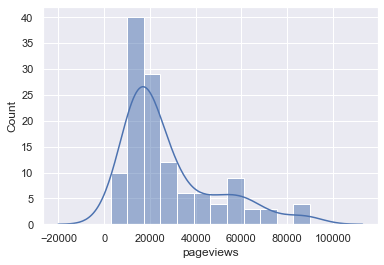

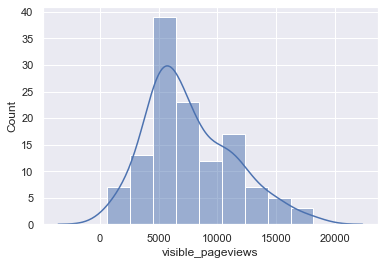

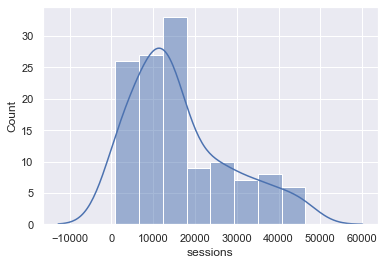

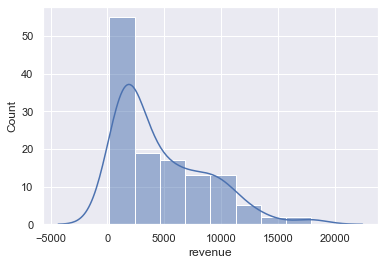

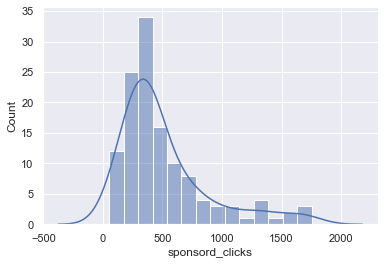

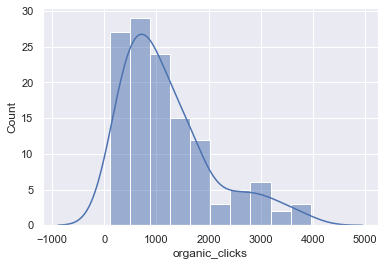

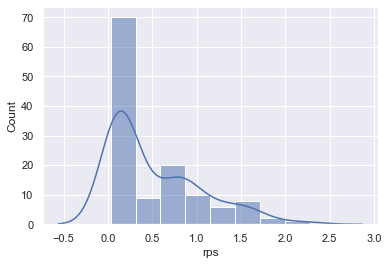

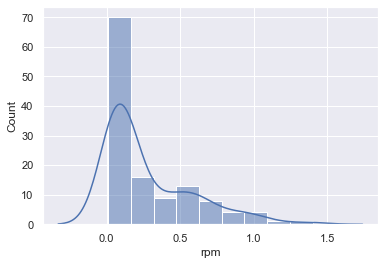

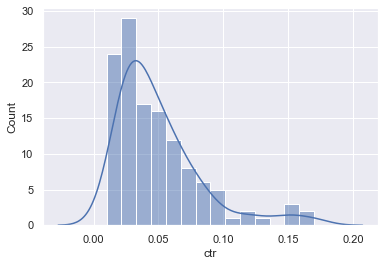

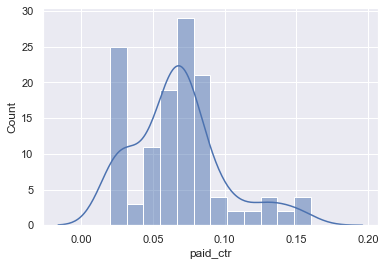

In [42]:
for i, col in enumerate(df[['pageviews',
       'visible_pageviews', 'sessions', 'revenue', 'sponsord_clicks',
       'organic_clicks', 'rps', 'rpm', 'ctr', 'paid_ctr']]):
    plt.figure(i)
    sns.histplot(df[col], kde=True, kde_kws={"cut": 3})

Let's use boxplots to compare distributions across different groups. This can help identify outliers.

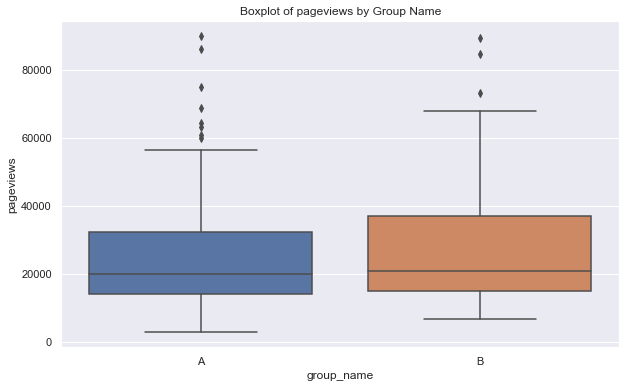

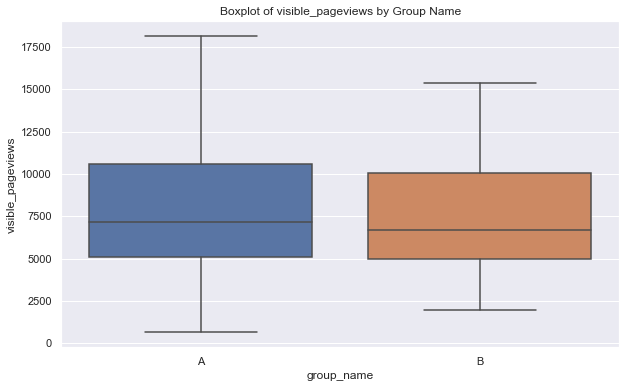

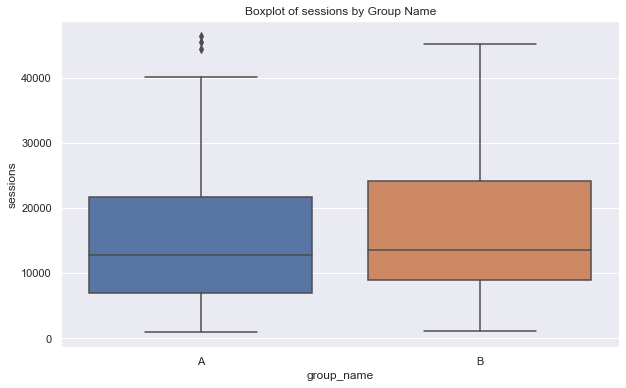

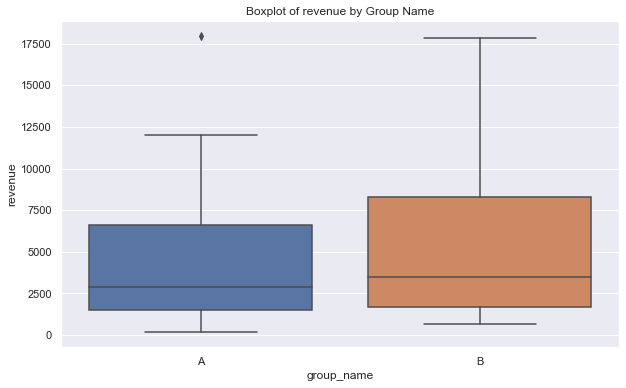

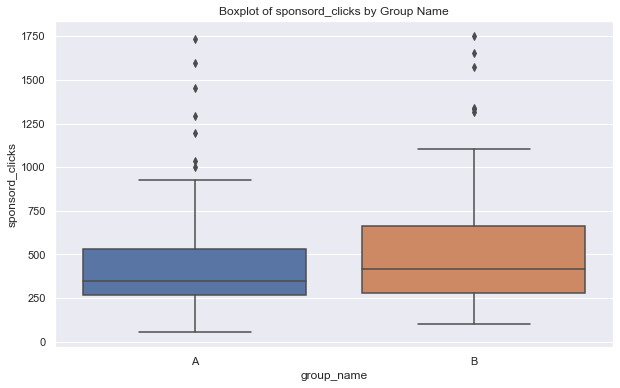

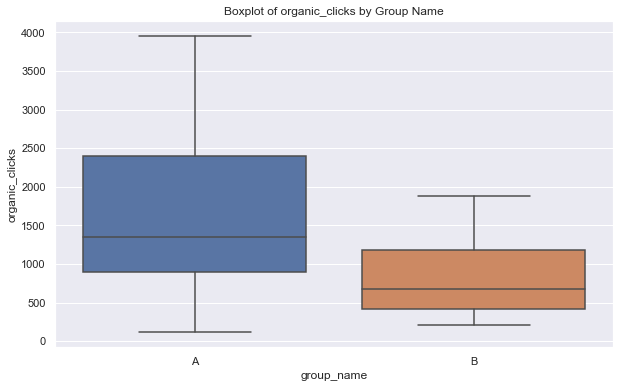

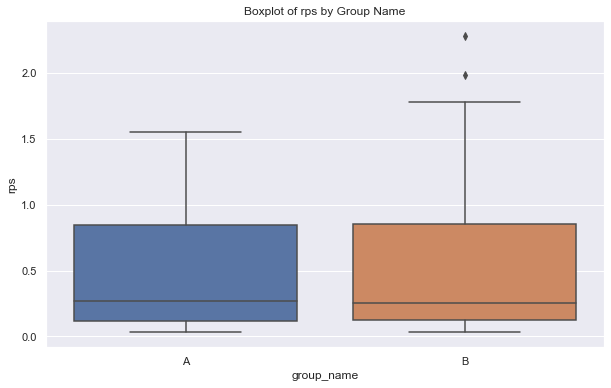

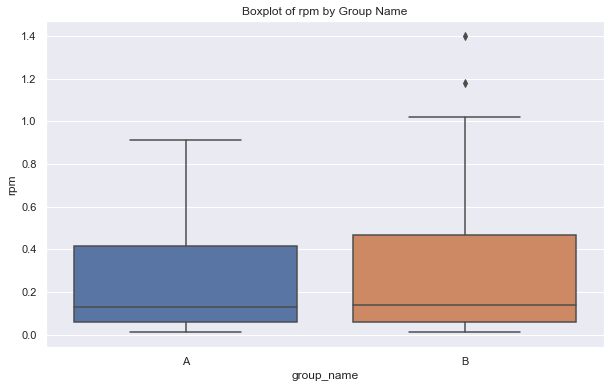

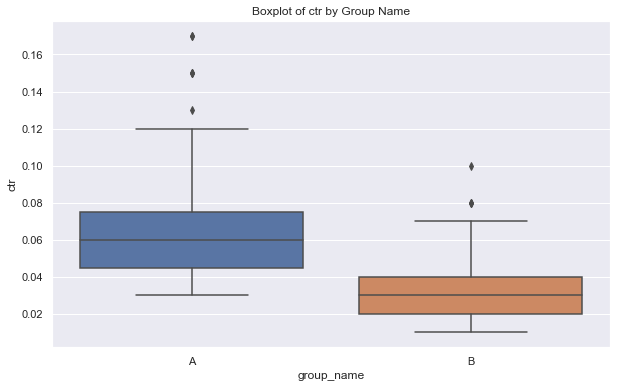

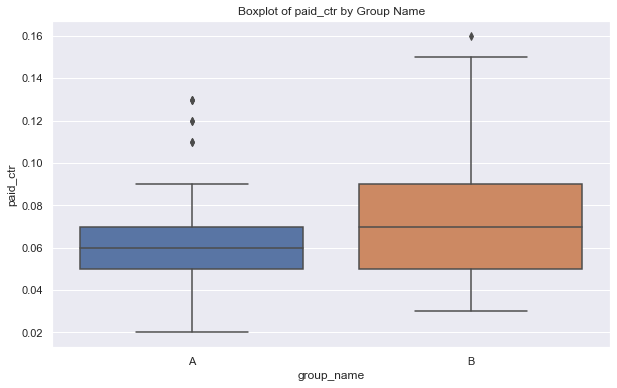

In [57]:
for col in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='group_name', y=col, data=df)
    plt.title(f'Boxplot of {col} by Group Name')
    plt.show()

Correlation Matrix will help us to explore relationships between numerical features

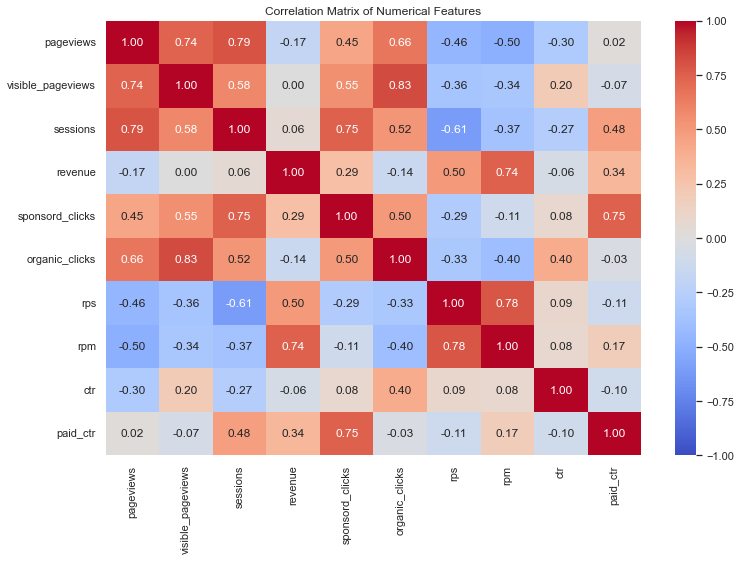

In [58]:
correlation_matrix = df[metrics].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Time Series Analysis
Metrics over time charts will help to identify trends or patterns.
Seasonality: Check for any seasonal patterns or spikes in data on certain days.

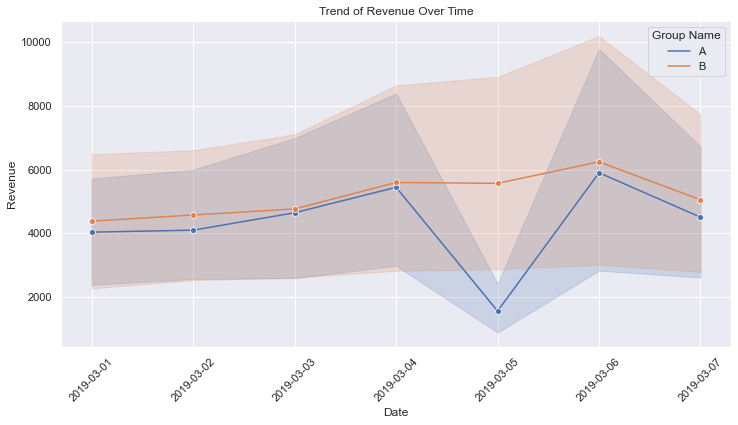

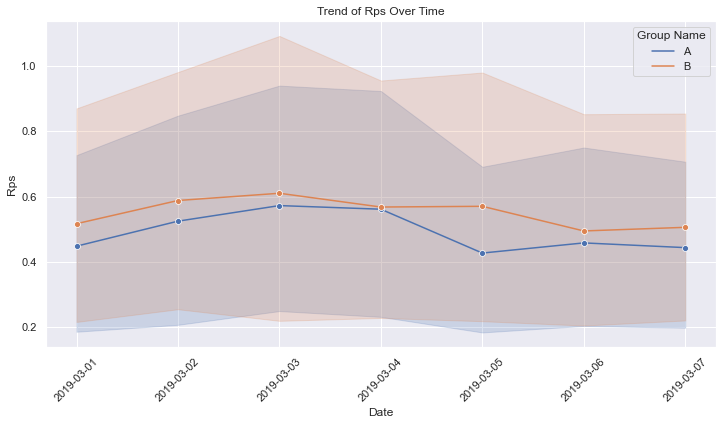

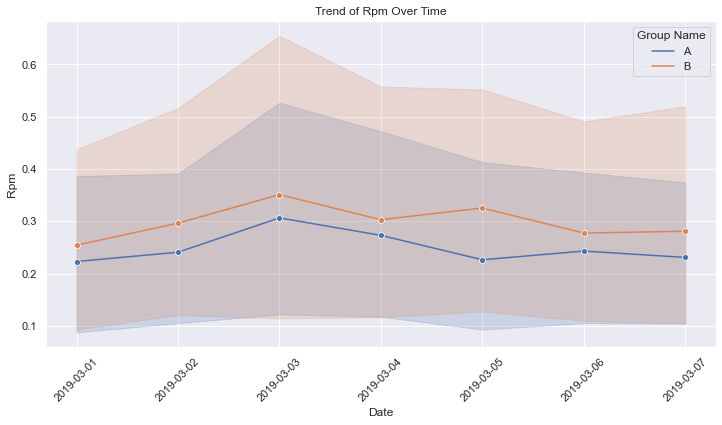

In [59]:
ab_metrics = ['revenue', 'rps', 'rpm']

for metric in ab_metrics:
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(data=df, x='date', y=metric, hue='group_name', marker='o')
    
    plt.title(f'Trend of {metric.capitalize()} Over Time')
    plt.xlabel('Date')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.legend(title='Group Name')
    
    plt.show()


In [16]:
df

,date,publisher_id,platform,group_name,pageviews,visible_pageviews,sessions,revenue,sponsord_clicks,organic_clicks
0,2019-03-01,101,Desktop,A,16580,5418,12684,3452.0,300,849
1,2019-03-01,101,Desktop,B,16191,4906,12717,3292.0,268,555
2,2019-03-01,106,Desktop,A,16227,11395,11750,2016.0,601,2425
3,2019-03-01,106,Desktop,B,15060,10369,11967,1974.0,663,1194
4,2019-03-01,106,Mobile,A,30494,7715,22843,8293.0,456,1600
...,...,...,...,...,...,...,...,...,...,...
121,2019-03-07,373,Desktop,B,32764,6967,1859,1572.0,222,988
122,2019-03-07,574,Mobile,A,56382,10763,40166,4798.0,1194,2801
123,2019-03-07,574,Mobile,B,55232,9795,40108,5195.0,1336,1662
124,2019-03-07,700,Mobile,A,12117,5676,7067,7907.0,374,1069


# Pivot Table

Let's create a pivot table to get a first glance of Comparative Analysis for the metrics of each group

In [61]:
agg_functions = {
    'pageviews': 'sum',
    'visible_pageviews': 'sum',
    'sessions': 'sum',
    'revenue': 'sum',
    'sponsord_clicks': 'sum',
    'organic_clicks': 'sum',
    'rps': 'mean',
    'rpm': 'mean',
    'ctr': 'mean',
    'paid_ctr': 'mean'
}

pivot_tables = {}
for metric in metrics:
    pivot_table = pd.pivot_table(df, 
                                 values=metric, 
                                 index='date', 
                                 columns='group_name', 
                                 aggfunc=agg_functions[metric])
    pivot_tables[metric] = pivot_table
    print(f"Pivot Table for {metric.capitalize()} ({agg_functions[metric]}):\n")
    print(pivot_table)
    print("\n" + "="*50 + "\n")

Pivot Table for Pageviews (sum):

group_name       A       B
date                      
2019-03-01  254142  245254
2019-03-02  256290  246211
2019-03-03  256252  244921
2019-03-04  314642  303441
2019-03-05   99432  221470
2019-03-06  278755  269944
2019-03-07  279053  271700


Pivot Table for Visible_pageviews (sum):

group_name      A      B
date                    
2019-03-01  69520  61072
2019-03-02  71880  61561
2019-03-03  73020  62964
2019-03-04  88512  76014
2019-03-05  28489  67699
2019-03-06  82186  72468
2019-03-07  78230  67874


Pivot Table for Sessions (sum):

group_name       A       B
date                      
2019-03-01  140626  140176
2019-03-02  139401  139335
2019-03-03  142512  140728
2019-03-04  167851  166922
2019-03-05   59250  144124
2019-03-06  180163  180997
2019-03-07  158490  159312


Pivot Table for Revenue (sum):

group_name        A        B
date                        
2019-03-01  36357.0  39454.0
2019-03-02  36913.0  41197.0
2019-03-03  41822.0  42892